# Import the packages

In [24]:
import pipeline as pi
from tifffile import imread,imwrite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
from placozoan.func_segmentation import get_holes_mask
from placozoan.base_features import SingleObjectFeatures

# Preprocessing

## Steps:
    
    - Increase the contrast of the image 
    - Segmenting the algae plane per plane
    - Removing them from background

In [2]:
start = time.time()

In [25]:
im = imread('../data/new_movies/19102022_18h21_2.tif')

In [42]:
alg_mask,mask = pi.pre_segm(im)
preprocessed = pi.stretch(im)

In [3]:
preprocessed,alg_mask = pi.preprocessing('../data/new_movies/19102022_16h43_3.tif')

Presegmenting ...
--------------------------------------------------------------
0.00 % done ...
0.10 % done ...
0.20 % done ...
0.30 % done ...
0.40 % done ...
0.50 % done ...
0.60 % done ...
0.70 % done ...
0.80 % done ...
0.90 % done ...
1.00 % done ...
1.10 % done ...
1.20 % done ...
1.30 % done ...
1.40 % done ...
1.50 % done ...
1.60 % done ...
1.70 % done ...
1.80 % done ...
1.90 % done ...
2.00 % done ...
2.10 % done ...
2.20 % done ...
2.30 % done ...
2.40 % done ...
2.50 % done ...
2.60 % done ...
2.70 % done ...
2.80 % done ...
2.90 % done ...
3.00 % done ...
3.10 % done ...
3.20 % done ...
3.30 % done ...
3.40 % done ...
3.50 % done ...
3.60 % done ...
3.70 % done ...
3.80 % done ...
3.90 % done ...
4.00 % done ...
4.10 % done ...
4.20 % done ...
4.30 % done ...
4.40 % done ...
4.50 % done ...
4.60 % done ...
4.70 % done ...
4.80 % done ...
4.90 % done ...
5.01 % done ...
5.11 % done ...
5.21 % done ...
5.31 % done ...
5.41 % done ...
5.51 % done ...
5.61 % done ...
5.71 % 

48.75 % done ...
48.85 % done ...
48.95 % done ...
49.05 % done ...
49.15 % done ...
49.25 % done ...
49.35 % done ...
49.45 % done ...
49.55 % done ...
49.65 % done ...
49.75 % done ...
49.85 % done ...
49.95 % done ...
50.05 % done ...
50.15 % done ...
50.25 % done ...
50.35 % done ...
50.45 % done ...
50.55 % done ...
50.65 % done ...
50.75 % done ...
50.85 % done ...
50.95 % done ...
51.05 % done ...
51.15 % done ...
51.25 % done ...
51.35 % done ...
51.45 % done ...
51.55 % done ...
51.65 % done ...
51.75 % done ...
51.85 % done ...
51.95 % done ...
52.05 % done ...
52.15 % done ...
52.25 % done ...
52.35 % done ...
52.45 % done ...
52.55 % done ...
52.65 % done ...
52.75 % done ...
52.85 % done ...
52.95 % done ...
53.05 % done ...
53.15 % done ...
53.25 % done ...
53.35 % done ...
53.45 % done ...
53.55 % done ...
53.65 % done ...
53.75 % done ...
53.85 % done ...
53.95 % done ...
54.05 % done ...
54.15 % done ...
54.25 % done ...
54.35 % done ...
54.45 % done ...
54.55 % done .

97.10 % done ...
97.20 % done ...
97.30 % done ...
97.40 % done ...
97.50 % done ...
97.60 % done ...
97.70 % done ...
97.80 % done ...
97.90 % done ...
98.00 % done ...
98.10 % done ...
98.20 % done ...
98.30 % done ...
98.40 % done ...
98.50 % done ...
98.60 % done ...
98.70 % done ...
98.80 % done ...
98.90 % done ...
99.00 % done ...
99.10 % done ...
99.20 % done ...
99.30 % done ...
99.40 % done ...
99.50 % done ...
99.60 % done ...
99.70 % done ...
99.80 % done ...
99.90 % done ...
Done Presegmenting!
--------------------------------------------------------------
Trying to correct the image... 
--------------------------------------------------------------
--------------------------------------------------------------
Done with the correction!
--------------------------------------------------------------
Increasing the contrast...
--------------------------------------------------------------
Done with the contrast!
--------------------------------------------------------------


# Drift computation

## Steps:

### Computing the drift between each plane

In [43]:
dx, dy = pi.global_drift(alg_mask)

0.00 % done ...
0.10 % done ...
0.20 % done ...
0.30 % done ...
0.40 % done ...
0.50 % done ...
0.60 % done ...
0.70 % done ...
0.80 % done ...
0.90 % done ...
1.00 % done ...
1.10 % done ...
1.20 % done ...
1.30 % done ...
1.40 % done ...
1.50 % done ...
1.60 % done ...
1.70 % done ...
1.80 % done ...
1.90 % done ...
2.00 % done ...
2.10 % done ...
2.20 % done ...
2.30 % done ...
2.40 % done ...
2.50 % done ...
2.60 % done ...
2.70 % done ...
2.80 % done ...
2.90 % done ...
3.00 % done ...
3.10 % done ...
3.20 % done ...
3.30 % done ...
3.40 % done ...
3.50 % done ...
3.60 % done ...
3.70 % done ...
3.80 % done ...
3.90 % done ...
4.00 % done ...
4.10 % done ...
4.20 % done ...
4.30 % done ...
4.40 % done ...
4.50 % done ...
4.60 % done ...
4.70 % done ...
4.80 % done ...
4.90 % done ...
5.01 % done ...
5.11 % done ...
5.21 % done ...
5.31 % done ...
5.41 % done ...
5.51 % done ...
5.61 % done ...
5.71 % done ...
5.81 % done ...
5.91 % done ...
6.01 % done ...
6.11 % done ...
6.21 % d

49.05 % done ...
49.15 % done ...
49.25 % done ...
49.35 % done ...
49.45 % done ...
49.55 % done ...
49.65 % done ...
49.75 % done ...
49.85 % done ...
49.95 % done ...
50.05 % done ...
50.15 % done ...
50.25 % done ...
50.35 % done ...
50.45 % done ...
50.55 % done ...
50.65 % done ...
50.75 % done ...
50.85 % done ...
50.95 % done ...
51.05 % done ...
51.15 % done ...
51.25 % done ...
51.35 % done ...
51.45 % done ...
51.55 % done ...
51.65 % done ...
51.75 % done ...
51.85 % done ...
51.95 % done ...
52.05 % done ...
52.15 % done ...
52.25 % done ...
52.35 % done ...
52.45 % done ...
52.55 % done ...
52.65 % done ...
52.75 % done ...
52.85 % done ...
52.95 % done ...
53.05 % done ...
53.15 % done ...
53.25 % done ...
53.35 % done ...
53.45 % done ...
53.55 % done ...
53.65 % done ...
53.75 % done ...
53.85 % done ...
53.95 % done ...
54.05 % done ...
54.15 % done ...
54.25 % done ...
54.35 % done ...
54.45 % done ...
54.55 % done ...
54.65 % done ...
54.75 % done ...
54.85 % done .

97.40 % done ...
97.50 % done ...
97.60 % done ...
97.70 % done ...
97.80 % done ...
97.90 % done ...
98.00 % done ...
98.10 % done ...
98.20 % done ...
98.30 % done ...
98.40 % done ...
98.50 % done ...
98.60 % done ...
98.70 % done ...
98.80 % done ...
98.90 % done ...
99.00 % done ...
99.10 % done ...
99.20 % done ...
99.30 % done ...
99.40 % done ...
99.50 % done ...
99.60 % done ...
99.70 % done ...
99.80 % done ...


### Filtering to find the moments the camera moved

In [44]:
df_drift,res = pi.filtering_drift(dx,dy)

# Segmentation of the preprocessed movie

In [120]:
import morphsnakes as ms
from skimage.filters import rank
from skimage.morphology import disk
import skimage.measure
from scipy import ndimage as nd

def mult_segmentation_chanvese(image,
                        disk_size:int=4,
                        iteration_nb:int=10):
    image = np.array(image)

    output_array_1 = np.zeros(image.shape, dtype = bool)
    output_array_2 = np.zeros(image.shape, dtype = bool)

    for t in range(0,image.shape[0]):
        print(f'{(t/np.shape(image)[0])*100:.2f} % done ...')
        im_single_t = image[t,:,:]
        im_filtered_minimum =  rank.minimum(im_single_t, disk(disk_size))
        im_ms = ms.morphological_chan_vese(im_filtered_minimum, iteration_nb)
        ms_filled = im_ms

        #detect if its is segmented the right way around (expecting that the background has most area touching the image border)
        #otherwise invert the image

        amount_edge_false = ms_filled[ms_filled[0,:] == False].shape[0] + ms_filled[ms_filled[-1,:] == False].shape[0] + ms_filled[ms_filled[:,0] == False].shape[0] + ms_filled[ms_filled[:,-1] == False].shape[0]
        
        
        amount_edge_true = ms_filled[ms_filled[0,:] == True].shape[0] + ms_filled[ms_filled[-1,:] == True].shape[0] + ms_filled[ms_filled[:,0] == True].shape[0] + ms_filled[ms_filled[:,-1] == True].shape[0]

        if amount_edge_true < amount_edge_false:
            pass
        else:
            ms_filled = np.logical_not(ms_filled)
            
        ms_filled = nd.binary_erosion(ms_filled,iterations=15)

        #label connected components in the binary mask
        #labels, num_features = nd.label(ms_filled)
        labels, count = skimage.measure.label(ms_filled,return_num=True,connectivity = 1)
        label_unique = np.unique(labels)
        
        #count pixels of each component and sort them by size, excluding the background

        vol_list = []
        for lab in label_unique:
            if lab != 0:
                vol_list.append(np.count_nonzero(labels == lab))

        #create binary array of only the largest component
        binary_mask_1 = np.zeros(labels.shape)
        binary_mask_2 = np.zeros(labels.shape)
        
        binary_mask_1 = np.where(labels == vol_list.index(max(vol_list))+1, 1, 0)
        vol_list.remove(max(vol_list))
        binary_mask_2 = np.where(labels == vol_list.index(max(vol_list))+1, 1, 0)
        
        output_array_1[t,:,:] = binary_mask_1
        output_array_2[t,:,:] = binary_mask_2

    return output_array_1,output_array_2


In [121]:
t = preprocessed[0:5,...]

u = (t // 256).astype(np.uint8)

In [122]:
m_1,m_2 = mult_segmentation_chanvese(u) 

0.00 % done ...
20.00 % done ...
40.00 % done ...
60.00 % done ...
80.00 % done ...


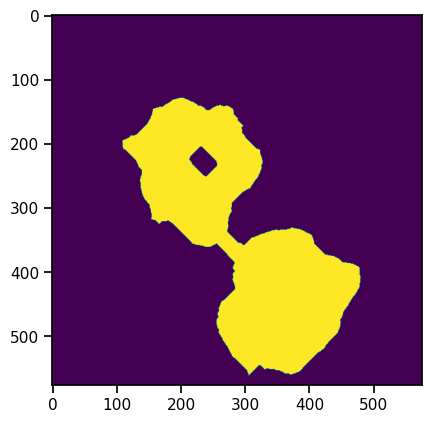

In [116]:
plt.imshow(m_1[4])
#plt.imshow(m_2[0])

In [149]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = u[0,...]
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [150]:
# noise removal
kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)


im = u[0,...].astype(np.uint8)


# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(im,markers)
img[markers == -1] = [255,0,0]


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'cv::watershed'


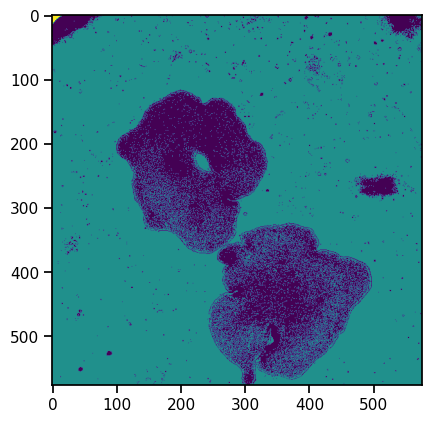

In [145]:
plt.imshow(markers)

In [6]:
mask = pi.segmentation_chanvese(preprocessed)

0.00 % done ...
0.10 % done ...
0.20 % done ...
0.30 % done ...
0.40 % done ...
0.50 % done ...
0.60 % done ...
0.70 % done ...
0.80 % done ...
0.90 % done ...
1.00 % done ...
1.10 % done ...
1.20 % done ...
1.30 % done ...
1.40 % done ...
1.50 % done ...
1.60 % done ...
1.70 % done ...
1.80 % done ...
1.90 % done ...
2.00 % done ...
2.10 % done ...
2.20 % done ...
2.30 % done ...
2.40 % done ...
2.50 % done ...
2.60 % done ...
2.70 % done ...
2.80 % done ...
2.90 % done ...
3.00 % done ...
3.10 % done ...
3.20 % done ...
3.30 % done ...
3.40 % done ...
3.50 % done ...
3.60 % done ...
3.70 % done ...
3.80 % done ...
3.90 % done ...
4.00 % done ...
4.10 % done ...
4.20 % done ...
4.30 % done ...
4.40 % done ...
4.50 % done ...
4.60 % done ...
4.70 % done ...
4.80 % done ...
4.90 % done ...
5.01 % done ...
5.11 % done ...
5.21 % done ...
5.31 % done ...
5.41 % done ...
5.51 % done ...
5.61 % done ...
5.71 % done ...
5.81 % done ...
5.91 % done ...
6.01 % done ...
6.11 % done ...
6.21 % d

48.85 % done ...
48.95 % done ...
49.05 % done ...
49.15 % done ...
49.25 % done ...
49.35 % done ...
49.45 % done ...
49.55 % done ...
49.65 % done ...
49.75 % done ...
49.85 % done ...
49.95 % done ...
50.05 % done ...
50.15 % done ...
50.25 % done ...
50.35 % done ...
50.45 % done ...
50.55 % done ...
50.65 % done ...
50.75 % done ...
50.85 % done ...
50.95 % done ...
51.05 % done ...
51.15 % done ...
51.25 % done ...
51.35 % done ...
51.45 % done ...
51.55 % done ...
51.65 % done ...
51.75 % done ...
51.85 % done ...
51.95 % done ...
52.05 % done ...
52.15 % done ...
52.25 % done ...
52.35 % done ...
52.45 % done ...
52.55 % done ...
52.65 % done ...
52.75 % done ...
52.85 % done ...
52.95 % done ...
53.05 % done ...
53.15 % done ...
53.25 % done ...
53.35 % done ...
53.45 % done ...
53.55 % done ...
53.65 % done ...
53.75 % done ...
53.85 % done ...
53.95 % done ...
54.05 % done ...
54.15 % done ...
54.25 % done ...
54.35 % done ...
54.45 % done ...
54.55 % done ...
54.65 % done .

97.10 % done ...
97.20 % done ...
97.30 % done ...
97.40 % done ...
97.50 % done ...
97.60 % done ...
97.70 % done ...
97.80 % done ...
97.90 % done ...
98.00 % done ...
98.10 % done ...
98.20 % done ...
98.30 % done ...
98.40 % done ...
98.50 % done ...
98.60 % done ...
98.70 % done ...
98.80 % done ...
98.90 % done ...
99.00 % done ...
99.10 % done ...
99.20 % done ...
99.30 % done ...
99.40 % done ...
99.50 % done ...
99.60 % done ...
99.70 % done ...
99.80 % done ...
99.90 % done ...


# Extracting the features

## Organism

In [7]:
prop = {'properties': ['label',
   'centroid',
   'area',
   'perimeter',
   'eccentricity'],'extra_properties': ['convexity']}

segmentator = SingleObjectFeatures(mask,preprocessed, params=prop)
df_props = segmentator.get_features()

In [8]:
df_props

,centroid-0,centroid-1,area,perimeter,eccentricity,convexity
label,,,,,,
1,342.452432,275.384756,48688,1079.567676,0.932235,0
2,342.414695,275.384431,48737,1079.567676,0.932058,0
3,342.435013,275.344137,48748,1079.810317,0.932118,0
4,342.481290,275.389325,48638,1079.567676,0.932384,0
5,342.411471,275.404733,48679,1078.153462,0.932189,0
...,...,...,...,...,...,...
995,237.697605,241.731259,48344,1083.928066,0.913364,0
996,237.489595,241.918741,48438,1078.614357,0.913663,0
997,237.439984,242.010009,48554,1115.833657,0.913374,0


In [9]:
df_props_correct = pi.clean_results(df_props,df_drift,window_size = 3)

## Wound

In [10]:
wound = get_holes_mask(mask)
segmentator = SingleObjectFeatures(wound,wound, params=prop)
df_props_wound = segmentator.get_features()

In [11]:
laser_frame = 19

In [12]:
#df_props_wound_correct = pi.clean_results(df_props_wound,df_drift)
df_props_wound_correct,time_wound = pi.interpolate_wound(df_props_wound,df_props,laser = laser_frame)

In [13]:
end = time.time() - start
print(f'The whole pipeline took {end/60:.2f} minutes to complete')

The whole pipeline took 19.04 minutes to complete


# Plotting results and extracting features

In [14]:
size_pixel= 2.6 #0.7692 #in microns

## Area over time for organism and wound

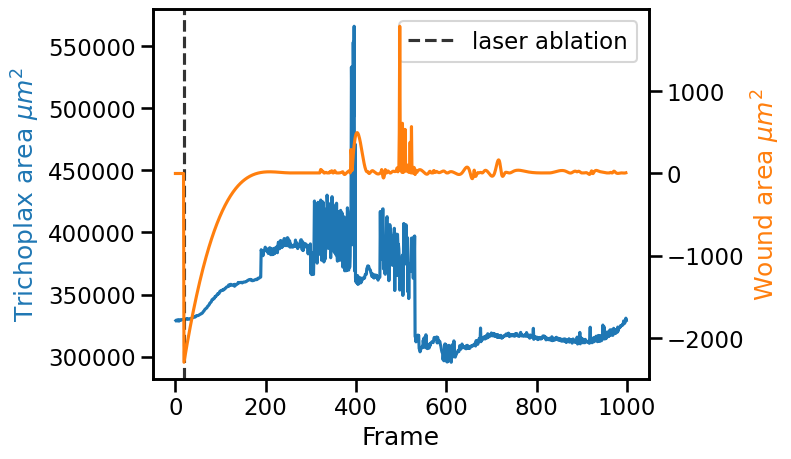

In [15]:
sns.set_context('talk')
fig,ax = plt.subplots()
ax2 = ax.twinx()

area_w = np.array((df_props_wound_correct.area.values))
area_o = np.array((df_props_correct.area.values))

sns.lineplot(x=df_props_correct.index.values,y = df_props_correct.area*(size_pixel)*(size_pixel),ax = ax,color='tab:blue')
sns.lineplot(x=df_props_wound_correct.index.values,y = df_props_wound_correct.area*(size_pixel)*(size_pixel), ax = ax2,color='tab:orange')
ax.set_ylabel('Trichoplax area $\mu m^2$',color = 'tab:blue')
ax2.set_ylabel('Wound area $\mu m^2$',color='tab:orange')
ax.set_xlabel('Frame')
ax.axvline(laser_frame,0,ax.get_ylim()[1],linestyle='--',color='black',alpha=0.8,label='laser ablation')
ax.legend()

plt.show()

## Ratio area wound/area organism

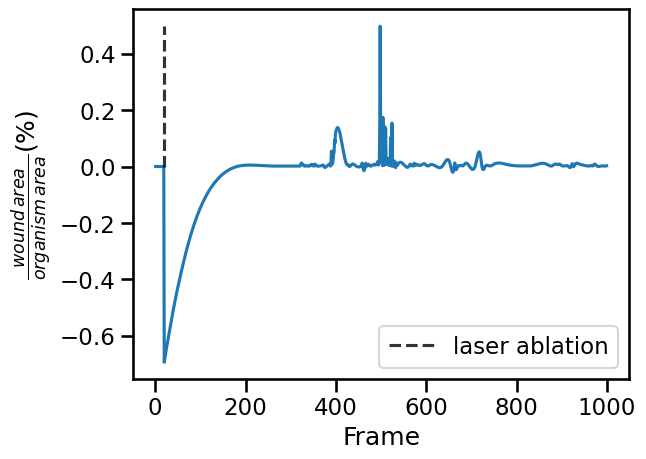

In [16]:
sns.lineplot(x = df_props.index.values,y = (area_w/area_o)*100)
plt.ylabel(r"$ \frac{wound\,area}{organism\,area}$" + '(%)')
plt.xlabel('Frame')
plt.vlines(laser_frame,0,max((area_w/area_o)*100),linestyle='--',color='black',alpha=0.8,label='laser ablation')
plt.legend()
plt.show()

## Area organism

<AxesSubplot:ylabel='area'>

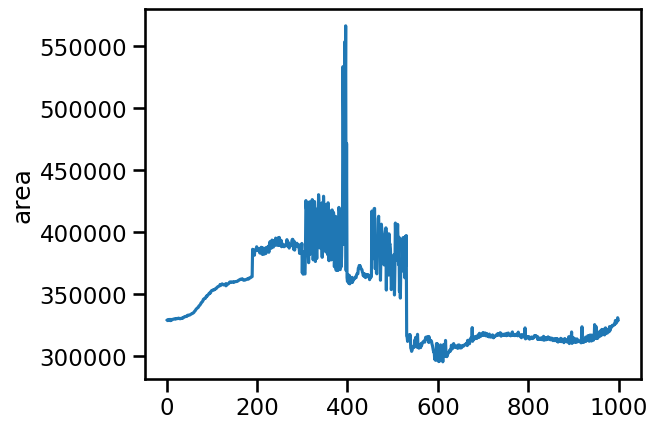

In [17]:
sns.lineplot(x=df_props_correct.index.values,y = df_props_correct.area*(size_pixel)*(size_pixel),color='tab:blue')

## Trajectory

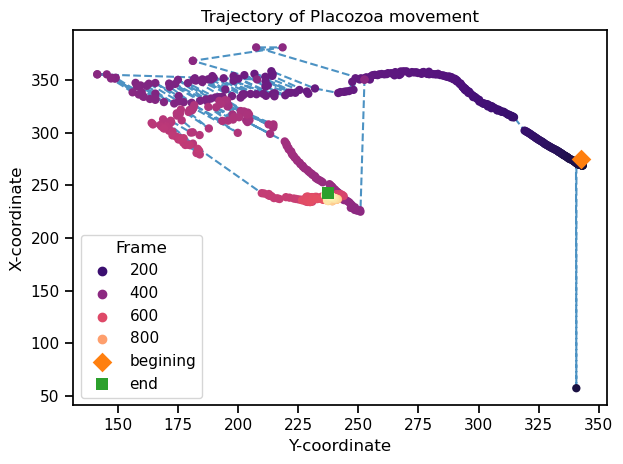

In [18]:
sns.set_context('notebook')

fig,ax = plt.subplots()

sns.scatterplot(x = df_props_correct['centroid-0'],y = df_props_correct['centroid-1'],marker="o"
                ,hue=df_props_correct.index,palette="magma",linewidth=0,ax=ax,hue_norm=(0,1000),zorder=1)

ax.scatter(x = df_props_correct['centroid-0'].values[0],y = df_props_correct['centroid-1'].values[0]
                ,marker="D",linewidth=0,label='begining',zorder=2,s=100)
ax.scatter(x = df_props_correct['centroid-0'].values[-1],y = df_props_correct['centroid-1'].values[-1]
                ,marker="s",linewidth=0,label='end',zorder=2,s=70)

ax.plot(df_props_correct['centroid-0'],df_props_correct['centroid-1'],linestyle='--',zorder=0,alpha=0.8)

plt.xlabel('Y-coordinate')
plt.ylabel('X-coordinate')
plt.title('Trajectory of Placozoa movement')
plt.legend(title='Frame')
plt.tight_layout()
#plt.savefig('../data/results/figures/complete_pipeline/trajectory')
plt.show()

In [19]:
end = time.time() - start
print(f'The whole pipeline took {end/60:.2f} minutes to complete')

The whole pipeline took 19.12 minutes to complete


# Saving the images and dataframes

## Saving the preprocessed image

In [20]:
path_preprocessed = '../data/new_movies/results/preprocessed/preprocessed_19102022_16h43_3.tif'
imwrite(path_preprocessed,preprocessed)

## Saving the mask

In [21]:
path_mask = '../data/new_movies/results/mask/preprocesed_19102022_16h43_3_mask.tif'
imwrite(path_mask,mask)

## Saving the dataframes

In [22]:
path_props= '../data/new_movies/results/tables/props_19102022_16h43_3.csv'
path_props_wound = '../data/new_movies/results/tables/props_wound_19102022_16h43_3.csv'
path_drift = '../data/new_movies/results/tables/drift_19102022_16h43_3.csv'

df_props_correct.to_csv(path_props)
df_props_wound_correct.to_csv(path_props_wound)
df_drift.to_csv(path_drift)

# Optional : visualizing the drift

In [ ]:
canva,diffx,diffy = pi.create_canva(df_drift,preprocessed)

rescaled = pi.place_img(canva,diffx,diffy,preprocessed,df_drift,res)

## Saving the canva

In [ ]:
path_canva = '../data/tricho_8_wound_drift_visualization.tif'
imwrite(path_canva,rescaled,compression='zlib') #adding compression to reduce file size